In [1]:
import pandas as pd

df = pd.read_csv('data-set\exames.csv')
df

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,926682,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


In [2]:
from sklearn.model_selection import train_test_split
from numpy import random
SEED = 123143
random.seed(SEED)

# os valores de X são todas as colunas menos id e diagnostico
x = df.drop(columns = ['id', 'diagnostico'])
y = df['diagnostico']

x_treino, x_teste, y_treino,  y_teste = train_test_split(x, y)

In [3]:
# removendo os valores vazios da base de dados

df.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [4]:
# 75% de dados ausentes na coluna exame 33, vamos excluir a coluna (se tivesse poucos dados ausentes a gnt preenchia com a média)
419/569

0.7363796133567663

In [5]:

from numpy import random
SEED = 123143
random.seed(SEED)

# os valores de X são todas as colunas menos id e diagnostico
x = df.drop(columns = ['id', 'diagnostico'])
y = df['diagnostico']

# Removendo a coluna com muitos valores ausentes
x_v1 = x.drop(columns = "exame_33")
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino,  y_teste = train_test_split(x_v1, y, test_size=0.3)

# utilizamos o modelo random forest - um modelo de conjunto de árvores de decisão
from sklearn.ensemble import RandomForestClassifier


# passamos o parâmetro n_estimators que é o número de arvores de decisão que serão utilizadas
modelo = RandomForestClassifier(n_estimators= 100) # cria o modelo
modelo.fit(x_treino, y_treino) # ajusta o modelo aos dados de treino

# o método score vai receber os dos de teste e retornar uma acurácia

print('Resultado: {:.2f}%' .format(modelo.score(x_teste, y_teste) * 100))

Resultado: 92.40%


In [6]:
# Precisamos saber se o modelo anterior é realmente expressivo, para isso, vamos comparar com outro modelo (baseline)
# O dummy classifier funciona classificando sempre o que mais aparece (é o classificador ingênuo)
from sklearn.dummy import DummyClassifier
SEED = 123143
random.seed(SEED)
modelo_base = DummyClassifier(strategy = "most_frequent")
modelo_base.fit(x_treino, y_treino) # ajusta o modelo aos dados de treino

# o método score vai receber os dos de teste e retornar uma acurácia

print('Resultado: {:.2f}%' .format(modelo_base.score(x_teste, y_teste) * 100))

Resultado: 66.67%


In [7]:
x = x.drop(columns = "exame_33")
x

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

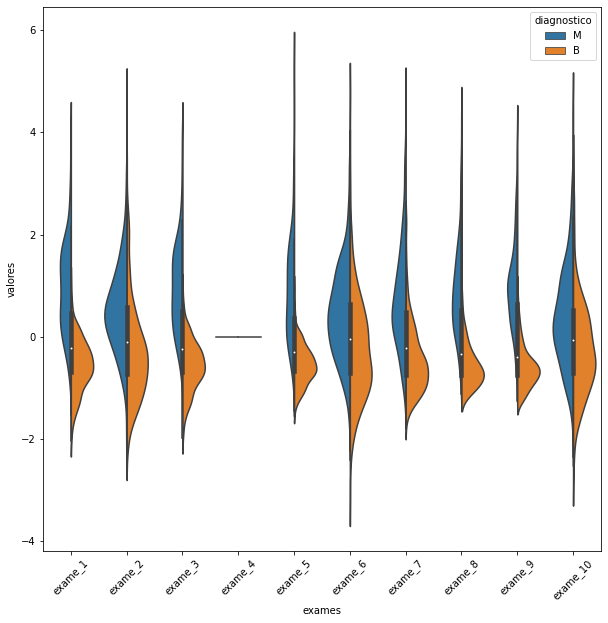

In [8]:
# estudando o comportamento dos dados
# violin plot
# os valores dos exames dividios pelas classes, no exemplo, maligno e beligno
import seaborn as sns
import matplotlib.pyplot as plt
# import para padronizar o eixo facilitando a visualização
from sklearn.preprocessing import StandardScaler
padronizador = StandardScaler()
padronizador.fit(x)
x_padronizado = padronizador.transform(x)
x_padronizado = pd.DataFrame(data = x_padronizado, columns=x.keys())
dados_plot = pd.concat([y, x_padronizado.iloc[:, :10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name= "valores")

plt.figure(figsize = (10, 10))
sns.violinplot(x = "exames", y = "valores", hue= "diagnostico",
               data = dados_plot, split= True)

plt.xticks(rotation = 45)

Perceba que o exame4 possui valores constantes, o que nao agrega muito para o processo de classificação

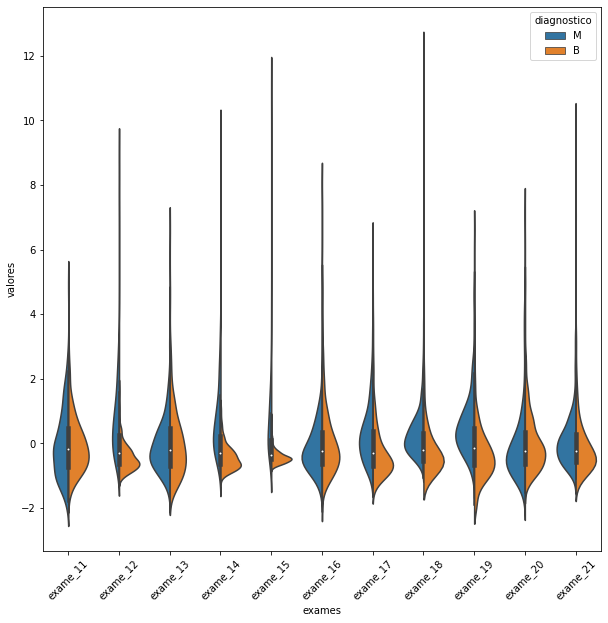

In [9]:
# função para plotar os gráficos dos dados completos
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([y, valores.iloc[:, inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name= "valores")

    plt.figure(figsize = (10, 10))
    sns.violinplot(x = "exames", y = "valores", hue= "diagnostico",
                data = dados_plot, split= True)

    plt.xticks(rotation = 45)


grafico_violino(x_padronizado, 10, 21)

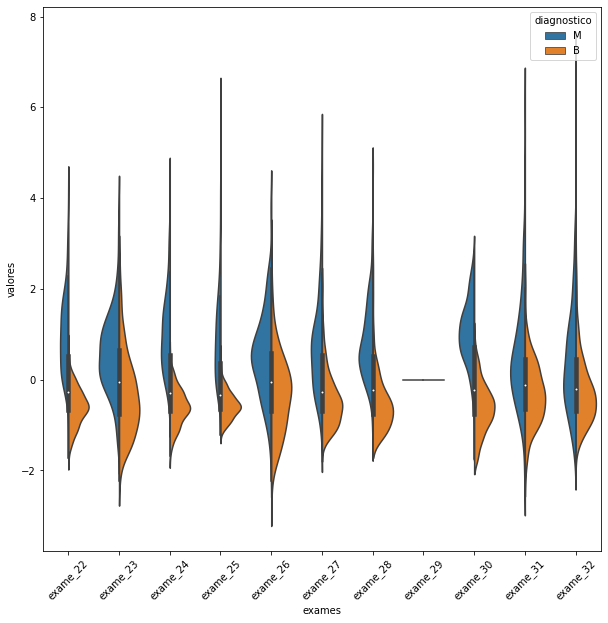

In [10]:
grafico_violino(x_padronizado, 21, 32)

Perceba que o exame29 possui valores constantes, o que nao agrega muito para o processo de classificação

In [11]:
x_padronizado_v2 = x_padronizado.drop(columns = ["exame_29", "exame_4"])

def classificar(valores):

    SEED = 1234
    from numpy import random
    random.seed(SEED)

    from sklearn.model_selection import train_test_split
    x_treino, x_teste, y_treino,  y_teste = train_test_split(valores, y, test_size=0.3)

    # utilizamos o modelo random forest - um modelo de conjunto de árvores de decisão
    from sklearn.ensemble import RandomForestClassifier


    # passamos o parâmetro n_estimators que é o número de arvores de decisão que serão utilizadas
    modelo = RandomForestClassifier(n_estimators= 100) # cria o modelo
    modelo.fit(x_treino, y_treino) # ajusta o modelo aos dados de treino

    # o método score vai receber os dos de teste e retornar uma acurácia

    print('Resultado: {:.2f}%' .format(modelo.score(x_teste, y_teste) * 100))


classificar(x_padronizado_v2)
# Nao caimos da baseline (92.4) e reduzimos em 2 dimensoes os nossos dados

Resultado: 92.98%


<AxesSubplot:>

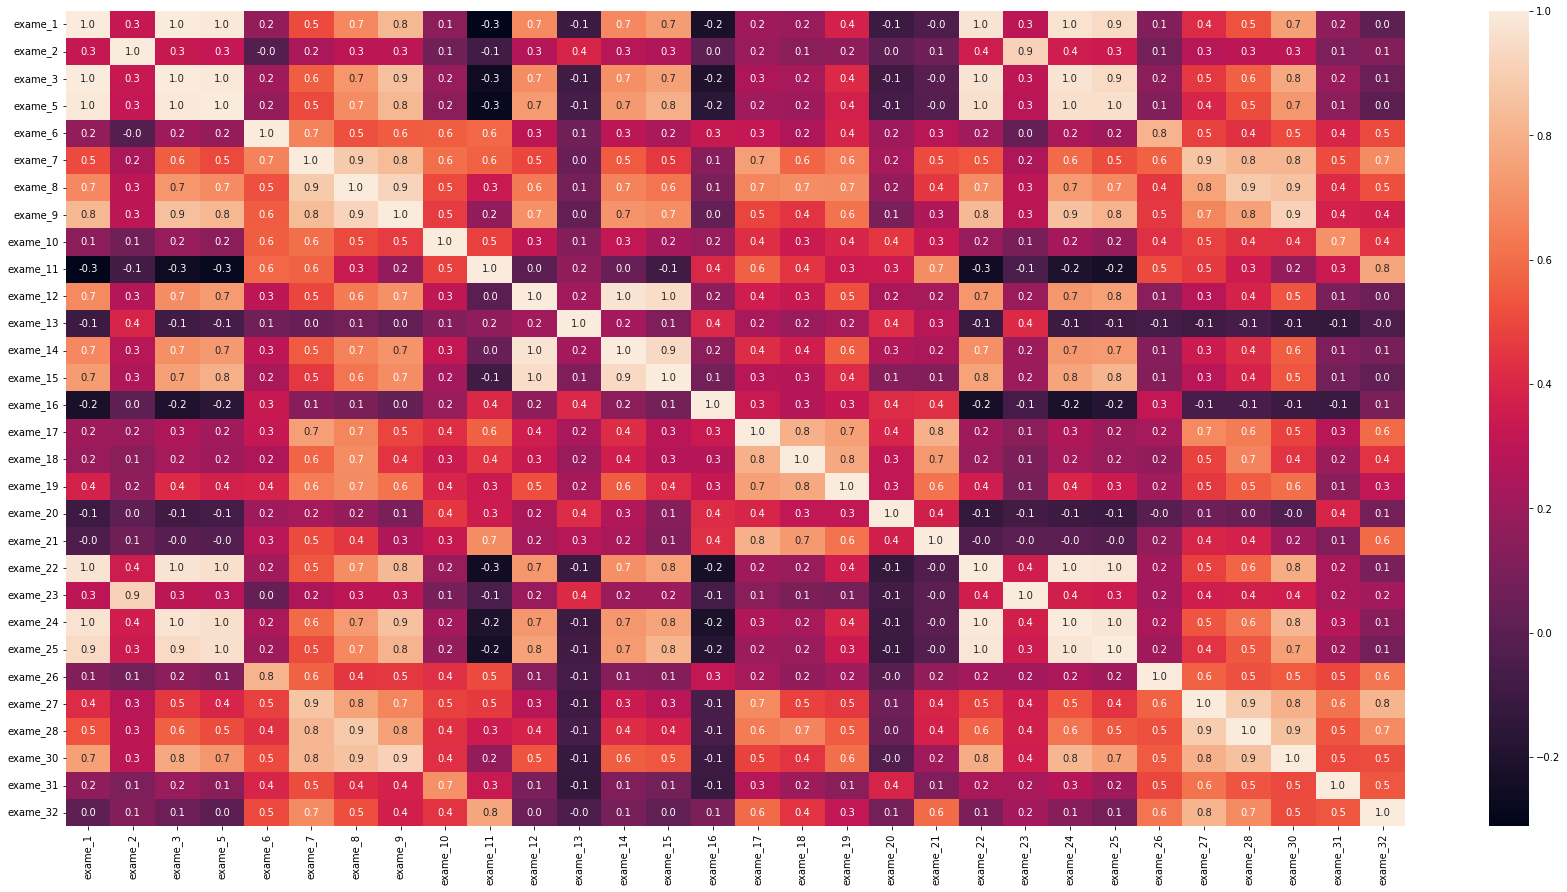

In [12]:
# criando uma matriz de correlação
matriz = x_padronizado_v2.corr()
plt.figure(figsize = (30, 15))
sns.heatmap(matriz, annot= True, fmt = ".1f")

In [13]:
matriz_v1 = matriz[matriz>0.99]
matriz_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# todos que estão maiores que 1 sao altamente correlacionados
matriz_v2 = matriz_v1.sum()
matriz_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [15]:
# variáveis altamente correlacionadas que devem ser excluidas (nao todas, so 1 das correlacionadas, no caso exclui exame 2 e 24)
variaveis_correlacionadas = matriz_v2[matriz_v2 > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [16]:
x_padronizado_v3 = x_padronizado_v2.drop(columns = variaveis_correlacionadas.keys())
x_padronizado_v3.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [17]:
classificar(x_padronizado_v3)
# resultado abaixo  da baseline porque excluimos todas as colunas correlacionadas e nao uma de cada

Resultado: 91.81%


In [18]:
x_padronizado_v4 = x_padronizado_v2.drop(columns = ['exame_3', 'exame_24'] )
classificar(x_padronizado_v4)

Resultado: 92.98%


In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selecionar_kmelhores = SelectKBest(chi2, k = 5)

# os dados padronizados possuem valores negativos e a função chi2 nao recebe valores negativos
x_v5 = x.drop(columns = (["exame_4", "exame_29", "exame_3", "exame_24"]))

SEED = 1234
random.seed(SEED)

from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x_v5, y, test_size=0.3)
selecionar_kmelhores.fit(x_treino, y_treino)
treino_kbest = selecionar_kmelhores.transform(x_treino)
teste_kbest = selecionar_kmelhores.transform(x_teste)

In [20]:
# dados apenas com 5 colunas (as melhores pelo kbest)
treino_kbest.shape

(398, 5)

In [21]:
# testando o modelo com as 5 melhores features
modelo = RandomForestClassifier(n_estimators=100, random_state=1234)
modelo.fit(treino_kbest, y_treino)

# o método score vai receber os dos de teste e retornar uma acurácia
print('Resultado: {:.2f}%' .format(modelo.score(teste_kbest, y_teste) * 100))

Resultado: 92.40%


[Text(0.5, 47.5, 'Predição'), Text(74.5, 0.5, 'Real')]

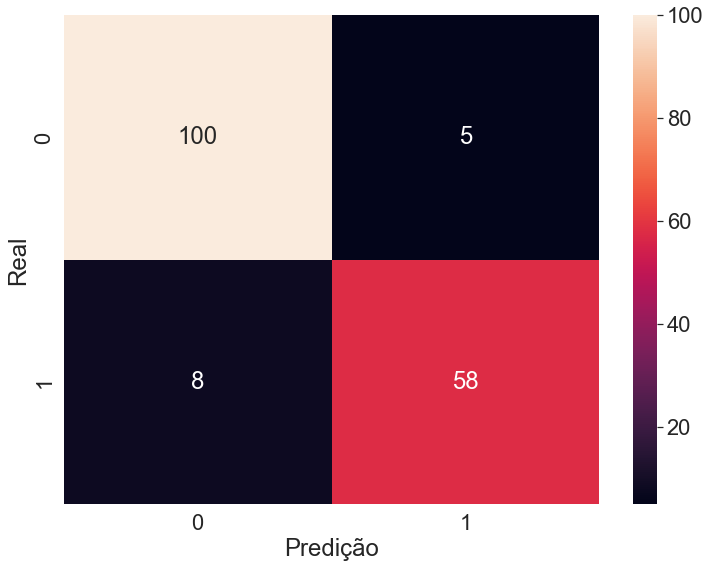

In [22]:
# reduzi drasticamente as features, mas estou erro mais quando é benigno? maligno? 
# matriz de confusao
from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(y_teste, modelo.predict(teste_kbest))


plt.figure(figsize = (12, 9))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

de 105 casos acerto 100 benigno, de 66 acerto 58 maligno

Resultado: 90.06%


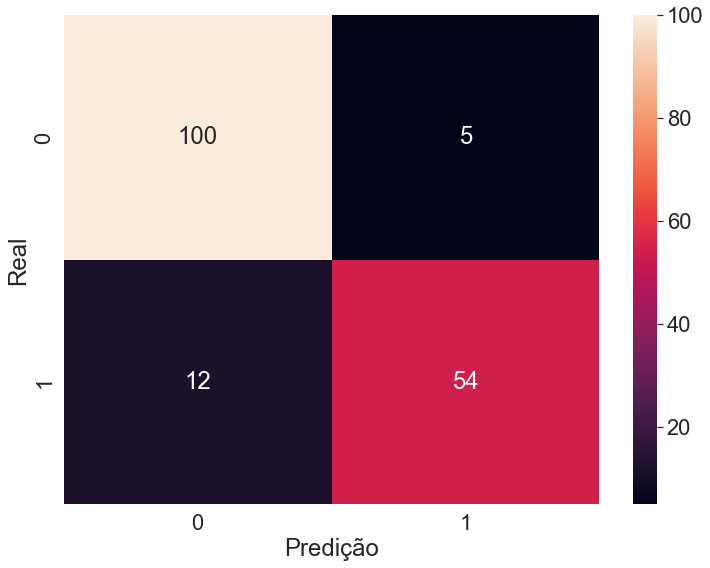

In [23]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x_v5, y, test_size=0.3)

modelo = RandomForestClassifier(n_estimators=100, random_state=1234)
modelo.fit(x_treino, y_treino)
selecionar_rfe = RFE(estimator= modelo, n_features_to_select= 5, step = 1)
selecionar_rfe.fit(x_treino, y_treino)
treino_rfe = selecionar_rfe.transform(x_treino)
teste_rfe = selecionar_rfe.transform(x_teste)

modelo.fit(treino_rfe, y_treino)

from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(y_teste, modelo.predict(teste_rfe))

plt.figure(figsize = (12, 9))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print('Resultado: {:.2f}%' .format(modelo.score(teste_rfe, y_teste) * 100))


O RFE erra mais no maligno

Resultado: 92.98%


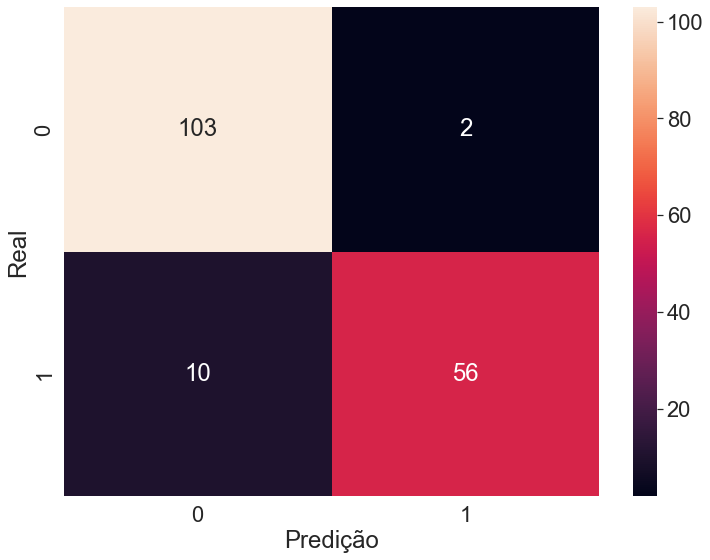

In [24]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x_v5, y, test_size=0.3)

modelo = RandomForestClassifier(n_estimators=100, random_state=1234)
modelo.fit(x_treino, y_treino)
selecionar_rfecv = RFECV(estimator= modelo, cv = 5,  step = 1, scoring = "accuracy")
selecionar_rfecv.fit(x_treino, y_treino)
treino_rfecv = selecionar_rfecv.transform(x_treino)
teste_rfecv = selecionar_rfecv.transform(x_teste)

modelo.fit(treino_rfecv, y_treino)

from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(y_teste, modelo.predict(teste_rfecv))

plt.figure(figsize = (12, 9))
sns.set(font_scale= 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

print('Resultado: {:.2f}%' .format(modelo.score(teste_rfecv, y_teste) * 100))


In [28]:
# features de destaque pelo RFECV
x_treino.columns[selecionar_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

C:\Users\joaop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


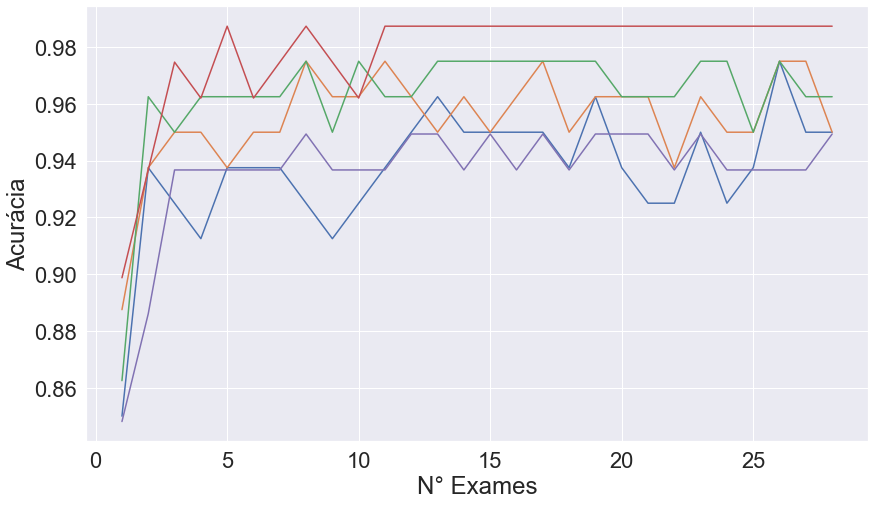

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 8))
plt.xlabel("N° Exames")
plt.ylabel("Acurácia")

x = range(1, len(selecionar_rfecv.grid_scores_)+1)
y = selecionar_rfecv.grid_scores_
plt.plot(x, y)
plt.show()